In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/train.csv')
df

,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,...,page2_clothing_model_A10,page2_clothing_model_A11,page2_clothing_model_A15,page2_clothing_model_A2,page2_clothing_model_A4,page2_clothing_model_A5,page2_clothing_model_B10,page2_clothing_model_B4,page2_clothing_model_P1,page2_clothing_model_others
0,2008,6,22,21,29,15648,3,13,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2008,5,19,6,29,10018,2,13,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2008,7,15,2,29,19388,3,9,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2008,5,2,2,29,7181,2,2,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2008,6,9,16,29,13493,2,9,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,4,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
132375,2008,6,19,9,29,15165,3,14,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
132376,2008,7,15,4,29,19359,1,3,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
132377,2008,7,28,16,29,21454,3,9,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


KMEANS

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
X = df.drop(columns=['year', 'month', 'day', 'order', 'country', 'session_id'])
scaler=StandardScaler()
X=scaler.fit_transform(X)

with open('scaler_cluster','wb') as f:
    pickle.dump(scaler, f)

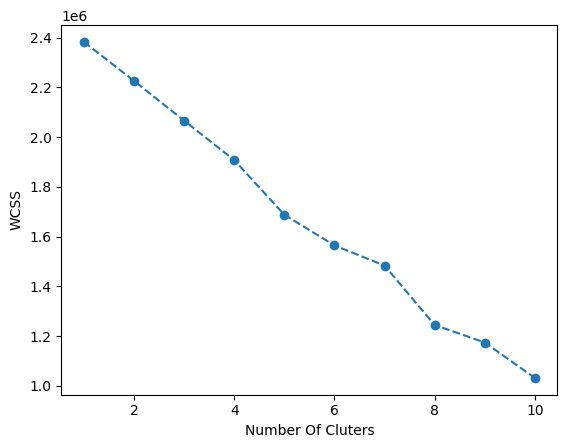

In [5]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


#Elbow graph plotting
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel("Number Of Cluters")
plt.ylabel("WCSS")
plt.show()

In [6]:
kmeans=KMeans(n_clusters=6,init='k-means++', random_state=42)
kmeans.fit(X)
df['Cluster']=kmeans.labels_

with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [7]:
df['Cluster'].value_counts()

,count
Cluster,
4,48854
0,43562
5,33429
2,2389
3,2134
1,2011


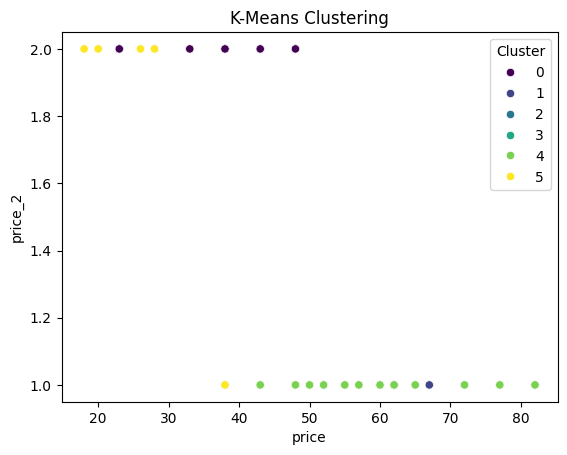

In [8]:
sns.scatterplot(x=df['price'], y=df['price_2'], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

DBSCAN

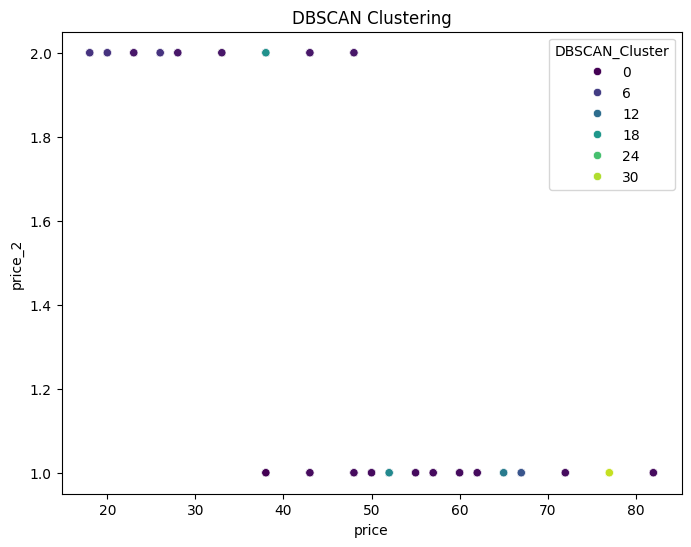

In [9]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)


# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['price'], y=df['price_2'], hue=df['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [13]:
df['DBSCAN_Cluster'].nunique()

35

In [10]:
df

,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,...,page2_clothing_model_A15,page2_clothing_model_A2,page2_clothing_model_A4,page2_clothing_model_A5,page2_clothing_model_B10,page2_clothing_model_B4,page2_clothing_model_P1,page2_clothing_model_others,Cluster,DBSCAN_Cluster
0,2008,6,22,21,29,15648,3,13,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,0
1,2008,5,19,6,29,10018,2,13,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1
2,2008,7,15,2,29,19388,3,9,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1
3,2008,5,2,2,29,7181,2,2,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2
4,2008,6,9,16,29,13493,2,9,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,4,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1
132375,2008,6,19,9,29,15165,3,14,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,2
132376,2008,7,15,4,29,19359,1,3,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,17
132377,2008,7,28,16,29,21454,3,9,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,5


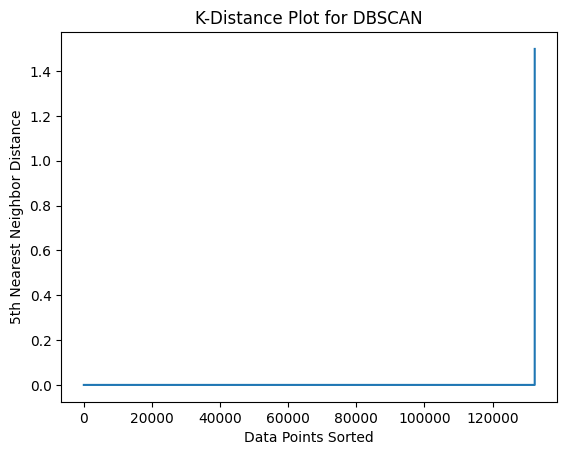

In [15]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort distances and plot
sorted_distances = np.sort(distances[:, -1])
plt.plot(sorted_distances)
plt.xlabel("Data Points Sorted")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Plot for DBSCAN")
plt.show()